In [1]:
import pandas as pd
import os,sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
indir = '/mnt/sdb/bgerke_cache/bto_ee_dr_cache/reeds_outputs/all_eligible_upgrades_20210513/ERCT'
os.listdir(indir)

['BaseDemand_Baseline_2012AMY',
 'BaseDemand_ControlsOnly_2012AMY',
 'BaseDemand_EnvelopeOnly_2012AMY',
 'BaseDemand_EnvelopePlusControlsPlusEquipment_2012AMY',
 'BaseDemand_EnvelopePlusControls_2012AMY',
 'BaseDemand_EquipmentOnly_2012AMY']

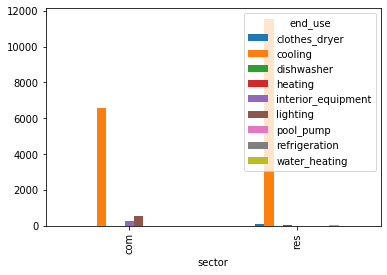

In [3]:
cap = pd.read_csv(os.path.join(indir,'BaseDemand_Baseline_2012AMY/2040/shed_capacity.csv'),
                  header=None, index_col=0).T
cap['capacity'] = cap['capacity'].astype(float)
maxcap = cap.groupby(['sector', 'end_use'])['capacity'].max()
(maxcap.unstack().fillna(0)).astype(float).div(1e3).plot.bar()

In [4]:
cap

0  sector             end_use procurement_price      capacity
1     com             cooling              50.0  8.622056e+05
2     com             cooling             100.0  3.087980e+06
3     com             cooling             150.0  5.289874e+06
4     com             cooling             200.0  6.538353e+06
5     com             cooling             300.0  6.548191e+06
6     com             heating              50.0  0.000000e+00
7     com             heating             100.0  2.463617e+01
8     com             heating             150.0  1.236409e+02
9     com             heating             200.0  1.477918e+02
10    com             heating             300.0  4.770897e+02
11    com  interior_equipment              50.0  0.000000e+00
12    com  interior_equipment             100.0  9.328107e+04
13    com  interior_equipment             150.0  1.968124e+05
14    com  interior_equipment             200.0  2.249597e+05
15    com  interior_equipment             300.0  2.670964e+05
16    com            lighting              50.0  0.000000e+00
17    com            lighting             100.0  0.000000e+00
18    com            lighting             150.0  0.000000e+00
19    com            lighting             200.0  0.000000e+00
20    com            lighting             300.0  5.151792e+05
21    com       refrigeration              50.0  0.000000e+00
22    com       refrigeration             100.0  1.292956e+02
23    com       refrigeration             150.0  3.770710e+02
24    com       refrigeration             200.0  1.903929e+03
25    com       refrigeration             300.0  5.463622e+03
26    com       water_heating              50.0  0.000000e+00
27    com       water_heating             100.0  9.160879e+02
28    com       water_heating             150.0  1.701510e+03
29    com       water_heating             200.0  2.245993e+03
30    com       water_heating             300.0  2.998563e+03
31    res       clothes_dryer              50.0  0.000000e+00
32    res       clothes_dryer             100.0  0.000000e+00
33    res       clothes_dryer             150.0  9.663562e+04
34    res       clothes_dryer             200.0  9.663562e+04
35    res       clothes_dryer             300.0  9.663562e+04
36    res             cooling              50.0  3.715138e+06
37    res             cooling             100.0  9.175523e+06
38    res             cooling             150.0  1.128143e+07
39    res             cooling             200.0  1.155933e+07
40    res             cooling             300.0  1.155933e+07
41    res          dishwasher              50.0  0.000000e+00
42    res          dishwasher             100.0  0.000000e+00
43    res          dishwasher             150.0  0.000000e+00
44    res          dishwasher             200.0  0.000000e+00
45    res          dishwasher             300.0  0.000000e+00
46    res             heating              50.0  0.000000e+00
47    res             heating             100.0  0.000000e+00
48    res             heating             150.0  2.107339e+04
49    res             heating             200.0  2.107339e+04
50    res             heating             300.0  2.107339e+04
51    res           pool_pump              50.0  0.000000e+00
52    res           pool_pump             100.0  6.195236e+03
53    res           pool_pump             150.0  9.013618e+03
54    res           pool_pump             200.0  9.046843e+03
55    res           pool_pump             300.0  9.211302e+03
56    res       water_heating              50.0  0.000000e+00
57    res       water_heating             100.0  3.563874e+04
58    res       water_heating             150.0  4.989432e+04
59    res       water_heating             200.0  4.989432e+04
60    res       water_heating             300.0  4.989432e+04

In [27]:
capacities = None
for subd in os.listdir(indir):
    eescen = subd.split('_')[1]
    for y in [2020,2030,2040]:
        cap = pd.read_csv(os.path.join(indir, subd, str(y), 'shed_capacity.csv'),
                  header=None, index_col=0).T
        cap['capacity'] = cap['capacity'].astype(float).div(1000)
        cap['End Use'] = cap['sector']+' '+cap['end_use']
        maxcap = cap.groupby('End Use')['capacity'].max().reset_index()
        maxcap['scenario']=eescen
        maxcap['year']=y
        if capacities is None:
            capacities = maxcap
        else:
            capacities = capacities.append(maxcap)

capacities.loc[capacities['End Use']=='res cooling']

End Use      capacity                           scenario  year
7  res cooling   8735.308964                           Baseline  2020
7  res cooling  10461.258262                           Baseline  2030
7  res cooling  11559.332370                           Baseline  2040
7  res cooling   8735.308964                       ControlsOnly  2020
7  res cooling  10410.114522                       ControlsOnly  2030
7  res cooling  11898.314784                       ControlsOnly  2040
7  res cooling   8735.308964                       EnvelopeOnly  2020
7  res cooling   8811.976143                       EnvelopeOnly  2030
7  res cooling   8379.977063                       EnvelopeOnly  2040
7  res cooling   8735.308964  EnvelopePlusControlsPlusEquipment  2020
7  res cooling   8130.942861  EnvelopePlusControlsPlusEquipment  2030
7  res cooling   5867.733355  EnvelopePlusControlsPlusEquipment  2040
7  res cooling   8735.308964               EnvelopePlusControls  2020
7  res cooling   9030.450463               EnvelopePlusControls  2030
7  res cooling   8621.742515               EnvelopePlusControls  2040
7  res cooling   8735.308964                      EquipmentOnly  2020
7  res cooling   8988.415067                      EquipmentOnly  2030
7  res cooling   7413.401575                      EquipmentOnly  2040

In [13]:
os.listdir(os.path.join(indir,'BaseDemand_Baseline_2012AMY/2040'))

['sheddable_load.csv',
 'shed_capacity.csv',
 'shiftable_load.csv',
 'shift_capacity.csv',
 'shift_daily_max.csv',
 'shift_windows.csv',
 'shift_max_load_increase.csv',
 'gross_net_load.csv']

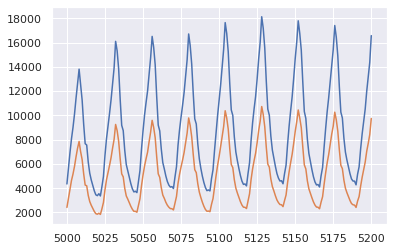

In [24]:
slbase = pd.read_csv((os.path.join(indir,'BaseDemand_Baseline_2012AMY/2040/shiftable_load.csv')), header=[0,1,2])
slequip = pd.read_csv((os.path.join(indir,'BaseDemand_EquipmentOnly_2012AMY/2040/shiftable_load.csv')), header=[0,1,2])
ax = slbase.loc[5000:5200,('res','cooling','300.0')].div(1000).plot()
slequip.loc[5000:5200,('res','cooling','300.0')].div(1000).plot(ax=ax)

In [10]:
cap

0  sector         end_use procurement_price     capacity             End Use
1     com         cooling              50.0    82.602676         com cooling
2     com         cooling             100.0   396.672869         com cooling
3     com         cooling             150.0   717.025145         com cooling
4     com         cooling             200.0   954.393192         com cooling
5     com         cooling             300.0  1218.442053         com cooling
6     com         heating              50.0    95.062766         com heating
7     com         heating             100.0   307.030182         com heating
8     com         heating             150.0   476.753436         com heating
9     com         heating             200.0   587.990412         com heating
10    com         heating             300.0   658.627520         com heating
11    com   refrigeration              50.0     0.000000   com refrigeration
12    com   refrigeration             100.0     0.000000   com refrigeration
13    com   refrigeration             150.0     0.096721   com refrigeration
14    com   refrigeration             200.0     0.394341   com refrigeration
15    com   refrigeration             300.0     1.105507   com refrigeration
16    com   water_heating              50.0     2.145016   com water_heating
17    com   water_heating             100.0     5.171869   com water_heating
18    com   water_heating             150.0     8.951609   com water_heating
19    com   water_heating             200.0     9.990244   com water_heating
20    com   water_heating             300.0    24.186009   com water_heating
21    res   clothes_dryer              50.0     0.000000   res clothes_dryer
22    res   clothes_dryer             100.0    88.360994   res clothes_dryer
23    res   clothes_dryer             150.0   123.705620   res clothes_dryer
24    res   clothes_dryer             200.0   123.705620   res clothes_dryer
25    res   clothes_dryer             300.0   123.705620   res clothes_dryer
26    res  clothes_washer              50.0     0.000000  res clothes_washer
27    res  clothes_washer             100.0     0.000000  res clothes_washer
28    res  clothes_washer             150.0     0.000000  res clothes_washer
29    res  clothes_washer             200.0     0.000000  res clothes_washer
30    res  clothes_washer             300.0     0.000000  res clothes_washer
31    res         cooling              50.0   173.811995         res cooling
32    res         cooling             100.0   259.262876         res cooling
33    res         cooling             150.0   335.799308         res cooling
34    res         cooling             200.0   413.603052         res cooling
35    res         cooling             300.0  1123.314294         res cooling
36    res      dishwasher              50.0     0.000000      res dishwasher
37    res      dishwasher             100.0     0.000000      res dishwasher
38    res      dishwasher             150.0    15.804347      res dishwasher
39    res      dishwasher             200.0    46.713280      res dishwasher
40    res      dishwasher             300.0    56.548205      res dishwasher
41    res         heating              50.0   239.808835         res heating
42    res         heating             100.0   370.830321         res heating
43    res         heating             150.0   621.800348         res heating
44    res         heating             200.0   806.795052         res heating
45    res         heating             300.0   999.466625         res heating
46    res       pool_pump              50.0     5.108206       res pool_pump
47    res       pool_pump             100.0    16.814281       res pool_pump
48    res       pool_pump             150.0    17.307696       res pool_pump
49    res       pool_pump             200.0    17.421322       res pool_pump
50    res       pool_pump             300.0    17.431206       res pool_pump
51    res   refrigeration              50.0     0.000000   res refrigerat

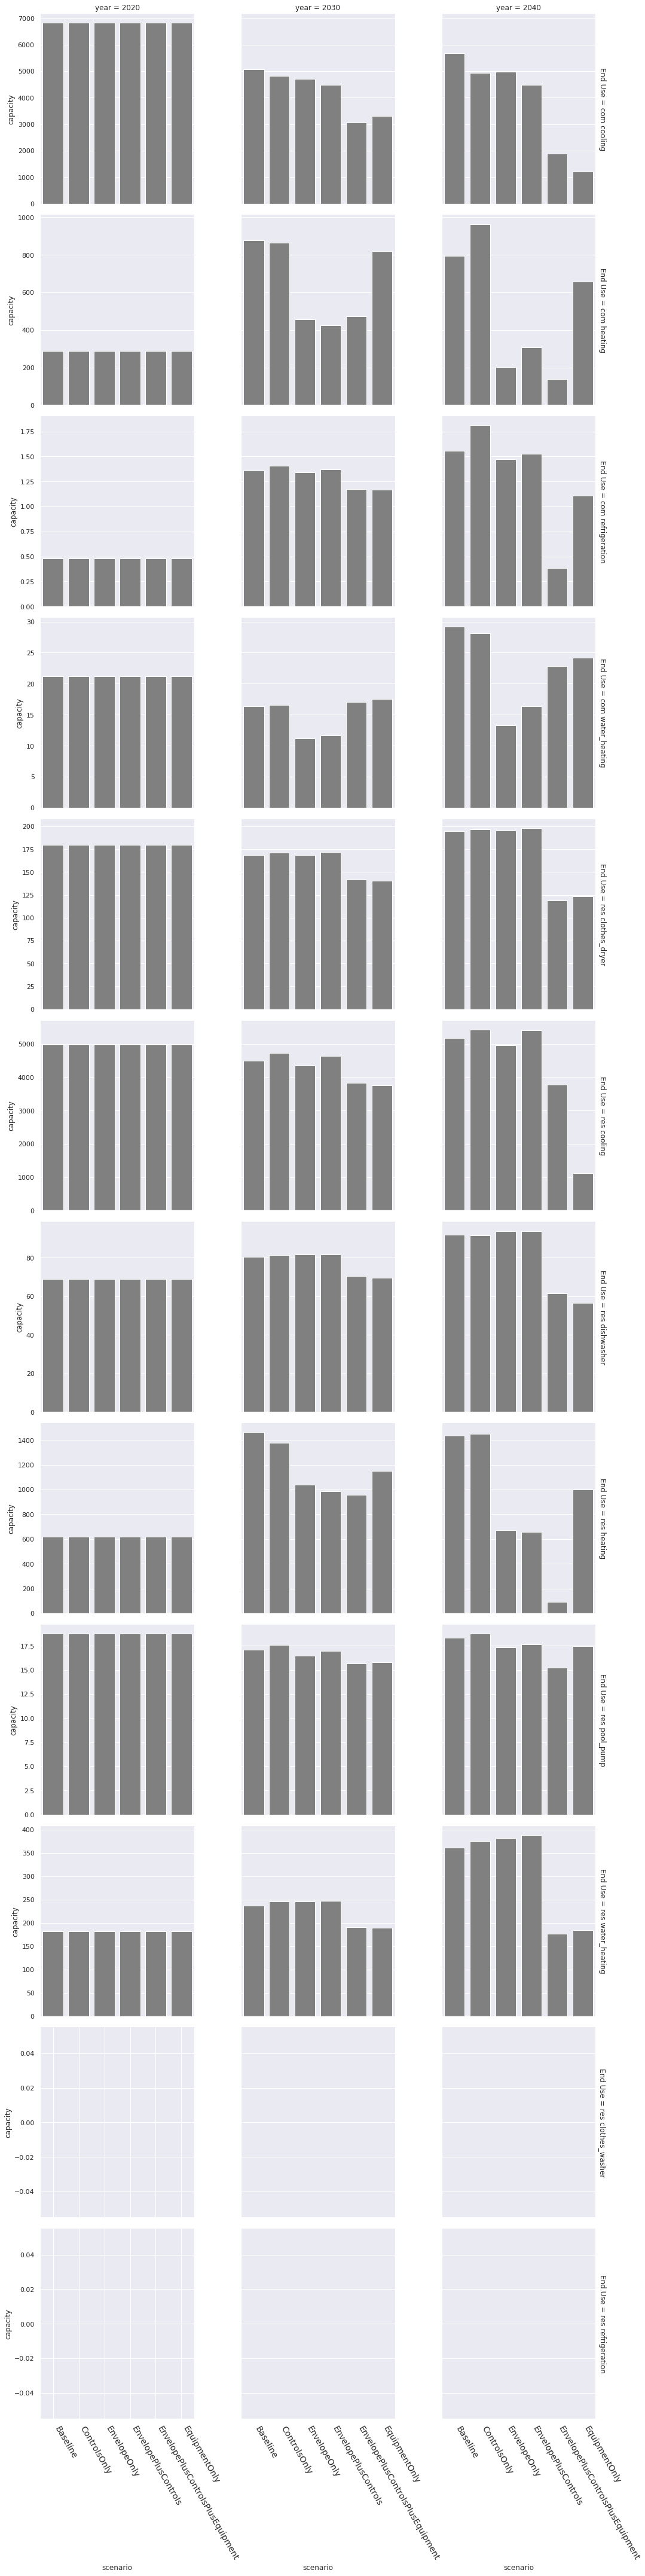

In [6]:
sns.set()
g = sns.catplot(data=capacities, kind='bar', col='year', row='End Use', x='scenario', y='capacity', 
                margin_titles=True, sharey='row', color='gray', # height=4, aspect=1,  
                order=['Baseline', 'ControlsOnly', 'EnvelopeOnly', 
                       'EnvelopePlusControls','EnvelopePlusControlsPlusEquipment','EquipmentOnly'])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=-60, horizontalalignment='left',
                            fontsize=14)
plt.tight_layout()